**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Isaac Carballo Perez
*   MATRÍCULA: A01796987


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [1]:
from posixpath import sep
# importing pandas and name it as pd
import pandas as pd

In [2]:
# Reading csv and loading in air_df pandas DataFrame
air_df = pd.read_csv("/content/LaqnData.csv")

In [3]:
# printing shape, columns, head(), tail() and dtypes
air_df.shape

(43800, 6)

In [4]:
air_df.columns

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [5]:
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [6]:
air_df.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [7]:
air_df.dtypes

,0
Site,object
Species,object
ReadingDateTime,object
Value,float64
Units,object
Provisional or Ratified,object


In [8]:
air_df.isna().sum()

,0
Site,0
Species,0
ReadingDateTime,0
Value,3230
Units,0
Provisional or Ratified,0


In [9]:
# Calculating the percentage of missing values per column
null_percentage = (air_df.isna().sum() / len(air_df)) * 100
null_percentage

,0
Site,0.000000
Species,0.000000
ReadingDateTime,0.000000
Value,7.374429
Units,0.000000
Provisional or Ratified,0.000000


2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [10]:
# Number of records
len(air_df)

43800

Numero de mediciones: 43800

In [11]:
air_df.nunique()

,0
Site,1
Species,5
ReadingDateTime,8760
Value,1847
Units,3
Provisional or Ratified,1


In [12]:
air_df["Species"].nunique()

5

Contaminantes del aire: 5

In [13]:
air_df.columns[air_df.nunique() == 1]

Index(['Site', 'Provisional or Ratified'], dtype='object')

Las columnas 'Site', 'Provisional' y 'Ratified' no agregan ningún valor informativo porque el valor único se repite en todo el conjunto de datos.

In [14]:
# Filter out columns with only one unique value
air_df = air_df.loc[:, air_df.nunique() > 1]

Se eliminan las columnascon valor único del conjunto de datos

In [15]:
air_df["Units"].unique()

array(['ug m-3', 'ug m-3 as NO2', 'ug/m3'], dtype=object)

In [16]:
air_df = air_df.drop(columns=["Units"]) # Dropping the Units column
air_df

,Species,ReadingDateTime,Value
0,NO,01/01/2017 00:00,3.5
1,NO,01/01/2017 01:00,3.6
2,NO,01/01/2017 02:00,2.2
3,NO,01/01/2017 03:00,2.1
4,NO,01/01/2017 04:00,3.3
...,...,...,...
43795,PM2.5,31/12/2017 19:00,-2.0
43796,PM2.5,31/12/2017 20:00,6.0
43797,PM2.5,31/12/2017 21:00,5.0
43798,PM2.5,31/12/2017 22:00,5.0


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [17]:
air_df["Species"].value_counts()

,count
Species,
NO,8760
NO2,8760
NOX,8760
PM10,8760
PM2.5,8760


In [18]:
air_df["Species"].value_counts().sum() == len(air_df)

True

 Las lecturas de cada contaminante coincide con el total de mediciones.

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [19]:
air_df.groupby(["Species"])["Value"].mean()

,Value
Species,
NO,15.045115
NO2,38.010185
NOX,61.078661
PM10,22.551704
PM2.5,14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [20]:
# Pivot the table to wide format with 'ReadingDateTime' as index, 'Species' as columns, and 'Value' as values.
pvt_df = air_df.pivot(index="ReadingDateTime", columns="Species", values="Value")
pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [21]:
# Using the describe method and transpose the result, so that the statistical it's visualized more easily
pvt_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
NO,8660.0,15.045115,26.678565,-2.0,3.1,7.1,15.5,401.79999
NO2,8660.0,38.010185,18.580841,2.8,23.8,35.3,49.9,120.20000
NOX,8660.0,61.078661,54.584805,1.0,30.3,46.9,73.8,734.29999
PM10,8657.0,22.551704,15.344755,-5.6,13.9,19.5,27.3,633.09998
PM2.5,5933.0,14.999831,13.558588,-8.0,7.0,11.0,18.0,128.00000


In [22]:
# Since pvt Data Frame has has index the dates of the tests we can use the idmax to know when the greatest values were achieved for each pollutant
pvt_df.idxmax()

,0
Species,
NO,23/01/2017 00:00
NO2,24/01/2017 19:00
NOX,23/01/2017 00:00
PM10,24/08/2017 15:00
PM2.5,22/01/2017 23:00


In [23]:
# Since pvt Data Frame has has index the dates of the tests we can use the idmin to know when the lowest values were achieved for each pollutant
pvt_df.idxmin()

,0
Species,
NO,08/06/2017 02:00
NO2,13/09/2017 02:00
NOX,06/06/2017 00:00
PM10,12/09/2017 23:00
PM2.5,03/08/2017 02:00


In [24]:
# Double-check (not essential): This line gets the maximum values for each pollutant and their corresponding dates.
pvt_df.loc[pvt_df.idxmax()]

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
23/01/2017 00:00,401.79999,118.2,734.29999,105.60000,120.0
24/01/2017 19:00,148.60001,120.2,348.10001,44.40000,42.0
23/01/2017 00:00,401.79999,118.2,734.29999,105.60000,120.0
24/08/2017 15:00,9.50000,31.4,46.00000,633.09998,NaN
22/01/2017 23:00,371.50000,119.9,689.50000,110.60000,128.0


In [25]:
# Check (not essential): This line gets the maximum values for each pollutant and their corresponding dates.
pvt_df.loc[pvt_df.idxmin()]

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
08/06/2017 02:00,-2.0,4.8,1.8,19.9,6.0
13/09/2017 02:00,0.2,2.8,3.1,11.8,NaN
06/06/2017 00:00,-1.6,3.6,1.0,14.9,3.0
12/09/2017 23:00,0.1,7.0,7.1,-5.6,NaN
03/08/2017 02:00,2.0,6.3,9.4,13.7,-8.0




*   El mayor valor de NO2 registrado es 120.20, pertenece al 24/01/2017
*   El menor valor de PM10 registrado es -5.6, pertence al 12/09/2017
*   La mediana del NO es 7.1. Significa que el 50% de las mediciones de NO son menores o iguales a la mediana, y el otro 50% son mayores o iguales a la mediana.
*   El primer cuartil de PM2.5 es 7.0. Significa que el 25% de las mediciones de PM2.5 son menores o iguales al primer cuartil.


7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

array([[<Axes: title={'center': 'NO'}>],
       [<Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOX'}>],
       [<Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'PM2.5'}>]], dtype=object)

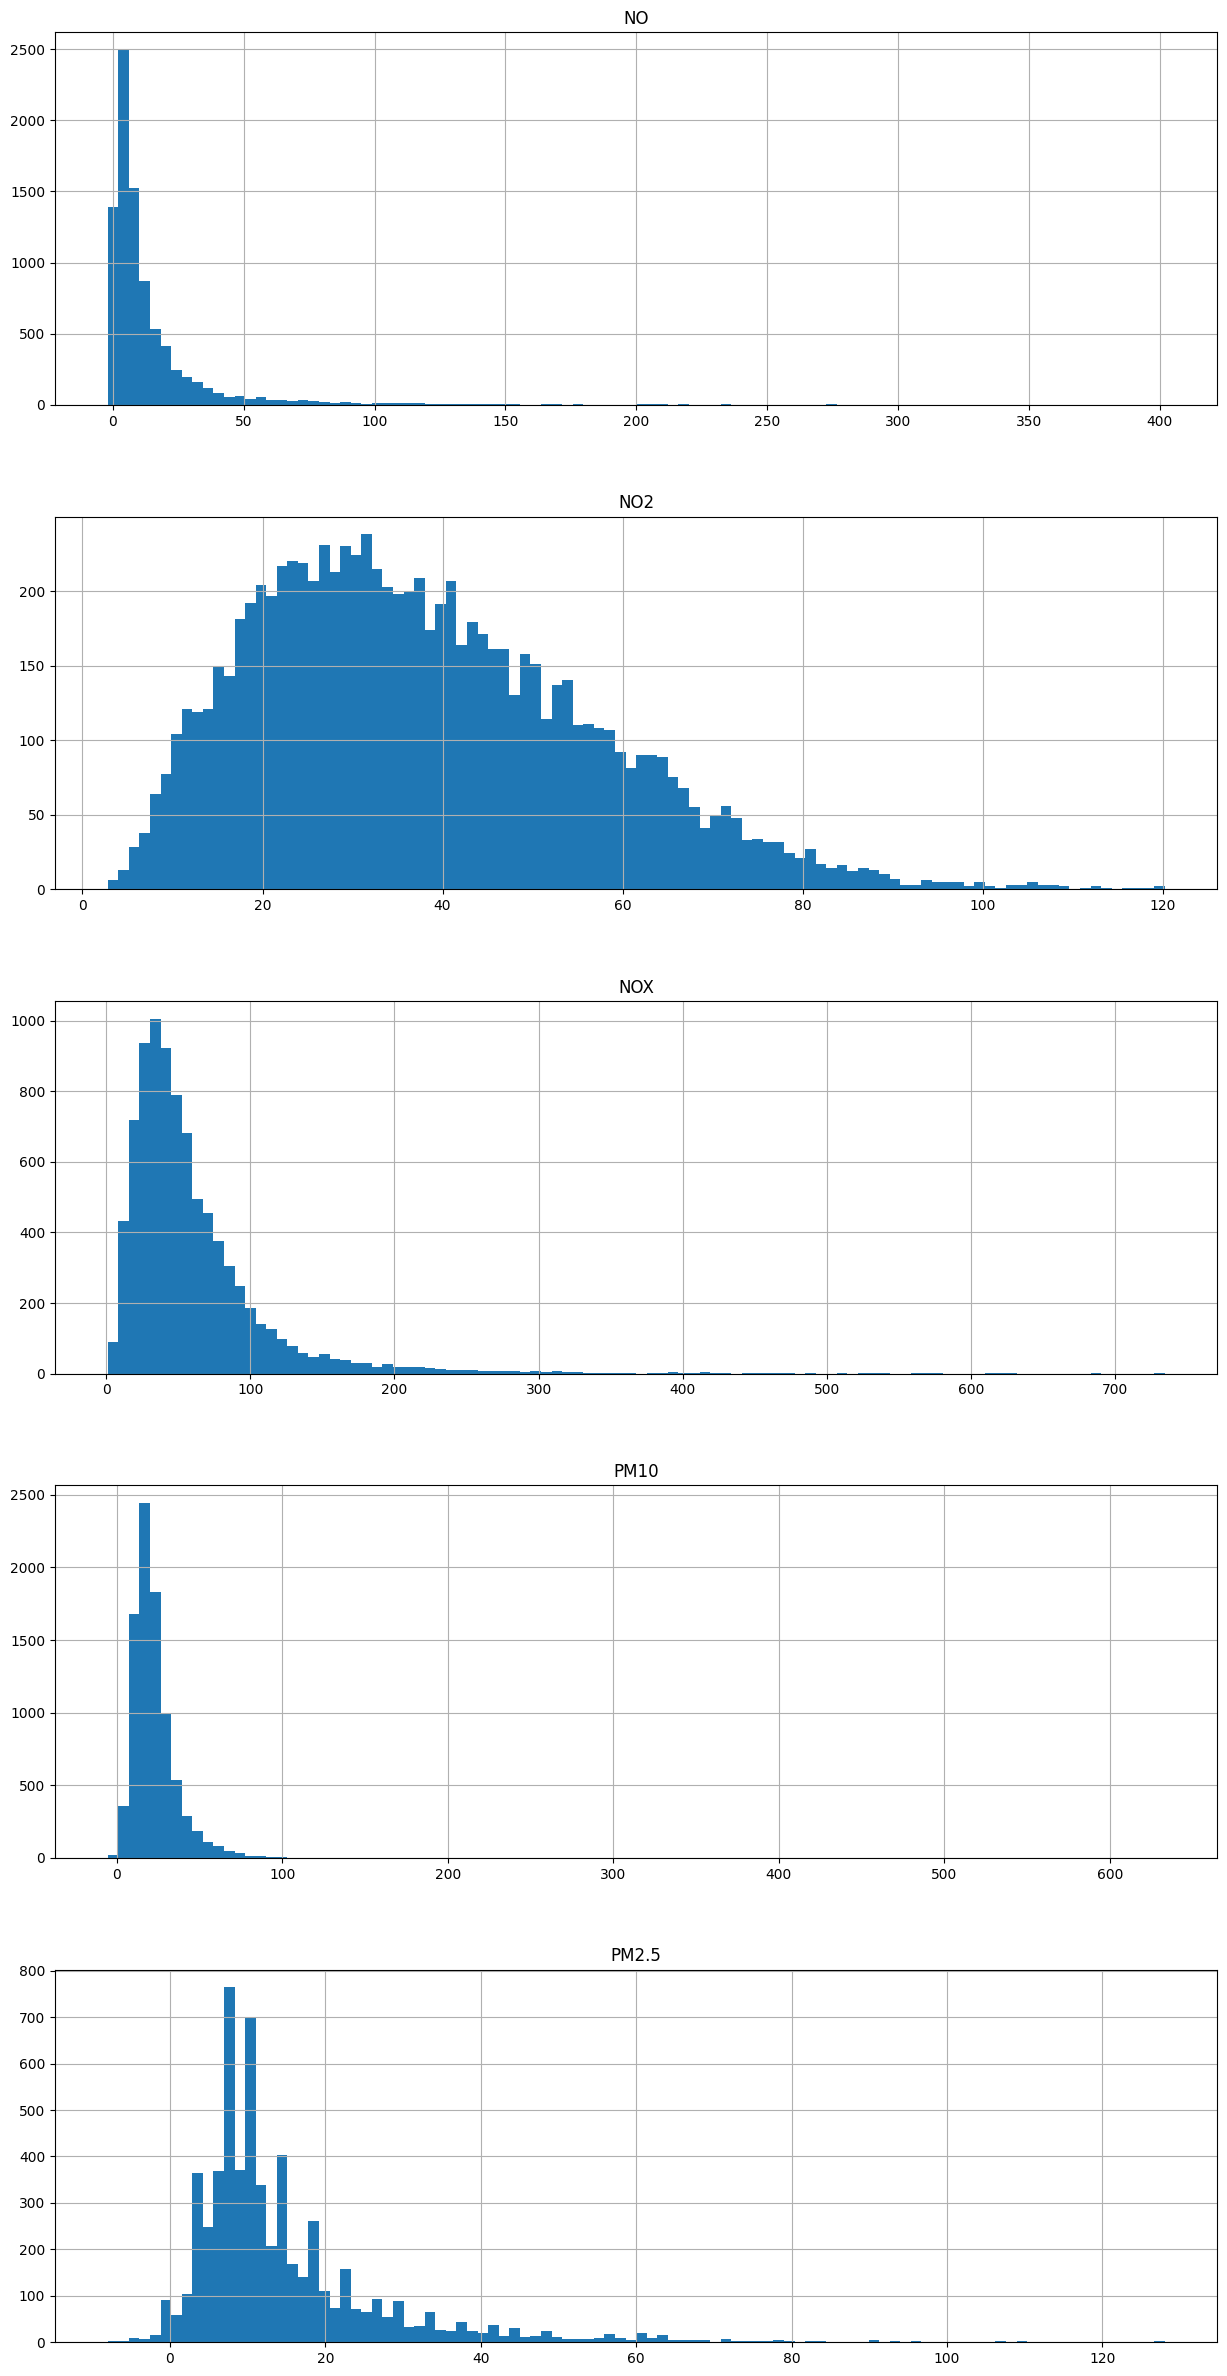

In [26]:
pvt_df.hist(figsize=(15, 30), layout=(pvt_df.shape[1], 1), bins=100)

A partir de los gráficos de un vistazo podemos concluir que el contaminante con mayor variabilidad es el NOX pero sin duda podemos corroborarlo con la función. `var()`



In [27]:
pvt_df.var()

,0
Species,
NO,711.745846
NO2,345.247664
NOX,2979.500946
PM10,235.461506
PM2.5,183.835300


Efectivamente el **NOX** es el que tiene mayor variabilidad

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [28]:
# Separa la columna ReadingDateTime que es de tipo string, usando el accesor
# de cadenas str y posteriormente el método split, para separar de acuerdo al
# número de elementos separados por un espacio en blanco ' '.
# expand = True expande la dimensionalidad, creando un DataFrame o MultiIndex
# con cada subcadena como una columna separada.
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)

# Asigna los nombres 'Date' y 'Time' a las nuevas columnas.
datetime_df.columns = ['Date','Time']

# Muestra el DataFrame resultante (datetime_df).
datetime_df

# Separa la columna 'Date' en tres columnas: 'Day', 'Month' y 'Year'.
date_df = datetime_df.Date.str.split('/',expand=True)

# Asigna los nombres 'Day', 'Month' y 'Year' a las nuevas columnas.
date_df.columns = ['Day','Month','Year']

# Muestra el DataFrame resultante (date_df).
date_df

# Esta línea realiza múltiples operaciones de transformación de datos:
# Primero une (join) el dataframe air_df con date_df,
# luego une el resultado con la columna Time del dataframe datetime_df
# Finalmente elimina las columnas redundantes 'ReadingDateTime' y 'Year'
#   - 'ReadingDateTime' se elimina porque la información ya está separada en date_df
#   - 'Year' es redundante ya que la fecha completa esta en date_df
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime', 'Year'])

# Establece las columnas 'Month', 'Day', 'Time' y 'Species' como índice del DataFrame air_df.
air_df = air_df.set_index(['Month','Day','Time','Species'])

# Muestra el DataFrame resultante (air_df).
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [29]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

No, las salidas del código del ejercicio 8 y la instrucción air_df.unstack() no son iguales.

Ejercicio 8: El código del ejercicio 8 crea un DataFrame air_df con un índice multinivel (Month, Day, Time, Species) y una columna 'Value'. La estructura es jerárquica y compacta.

air_df.unstack(): Esta instrucción toma el DataFrame air_df y lo "desapila", llevando el nivel 'Species' del índice a las columnas. Esto resulta en un DataFrame más ancho, donde cada contaminante tiene su propia columna.

En resumen: Aunque ambas representan la misma información, la organización y estructura de los DataFrames resultantes son diferentes. El código del ejercicio 8 produce un DataFrame en formato largo, mientras que air_df.unstack() lo transforma en un formato más ancho.

Como adicional:

- unstack() por defecto opera sobre el último nivel del índice.
- Si solo hay una columna de valores, unstack() la usa para reorganizar los datos.
- Si hay varias columnas de valores, unstack() intenta "desapilar" el último nivel del índice para cada columna.

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Los pares melt()/pivot() y stack()/unstack() son como primos hermanos - hacen cosas similares pero con sus propios "estilos".

melt()/pivot():

- melt() "derrite" las columnas en filas,
creando dos columnas clave: una para los nombres de las columnas originales y otra para sus valores.

- pivot() hace lo contrario: toma datos en formato largo y los reestructura en formato ancho
- Son más flexibles y explícitos en su uso
- Trabajan principalmente con columnas

stack()/unstack():

- stack() colapsa un nivel del índice de columnas moviéndolo al índice de filas
- unstack() hace lo opuesto: mueve un nivel del índice de filas a las columnas
- Están más orientados a trabajar con índices multinivel
- Son más concisos pero requieren que los datos tengan cierta estructura

Si tuviera que elegir una contraparte para melt() entre stack()/unstack(), hay dos formas de interpretar la pregunta:

1. Como función similar (mismo propósito):
Si tuviera que elegir una contraparte para melt(), me inclinaría por stack(). ¿Por qué? Porque ambas funciones tienen el mismo objetivo fundamental: convertir columnas en filas. Sin embargo, stack() es más eficiente cuando trabajamos con datos que ya tienen una estructura de índices bien definida, mientras que melt() es más versátil pero puede requerir más parámetros para lograr el mismo resultado.
2. Como función opuesta (operación inversa):
Si consideramos "contraparte" como la función opuesta, entonces unstack() sería la elección más adecuada como contraparte de melt(). Esto es porque unstack() realiza la operación inversa a stack(), transformando filas en columnas, similar a cómo pivot() es el opuesto de melt(). En este sentido, unstack() puede verse como una alternativa a pivot() cuando trabajamos con datos que tienen una estructura de índices multinivel bien definida.